In [1]:
import torch
import numpy as np

import ast
%load_ext autoreload
%autoreload 2

In [2]:
# sys.version

In [3]:
import model
import train

In [4]:
import ast

In [5]:
def fails(func):
    try:
        func()
        return False
    except:
        return True

In [6]:
data = train.read_all()
data = {handle:result_for_handle for handle, result_for_handle in data.items() if len(result_for_handle) >= 45 and len(result_for_handle) <= 70}

In [7]:
for handle, result_for_handle in data.items():
    current = {}
    for problem, solution in result_for_handle.items():
#         if problem in common_problems:
            if not fails(lambda: ast.parse(solution)):
                current[problem] = solution
    
    data[handle] = current

In [8]:
batch_sampler = train.StratifiedBatcher(data, 64, 0.75)
# batch_sampler = train.NameBatcher(data, 64, train_problems, test_problems)

In [9]:
batch_sampler.get_n_classes()

11

In [10]:
np.unique(batch_sampler.y_train, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([49, 39, 45, 51, 45, 38, 39, 49, 39, 40, 38]))

In [11]:
np.unique(batch_sampler.y_test, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([17, 14, 16, 18, 15, 13, 13, 17, 13, 14, 13]))

In [12]:
# cls_1 = model.Model(batch_sampler.get_n_classes(), embedding_dims=100)

In [24]:
cls = model.Model(batch_sampler.get_n_classes(), embedding_dims=30)

In [25]:
torch.set_num_threads(1)

In [26]:
# trainer = train.Trainer(cls, torch.nn.CrossEntropyLoss(), torch.optim.SGD(cls.parameters(), lr=0.01, momentum=0.9))
trainer = train.Trainer(cls, torch.nn.CrossEntropyLoss(), torch.optim.Adam(cls.parameters()))

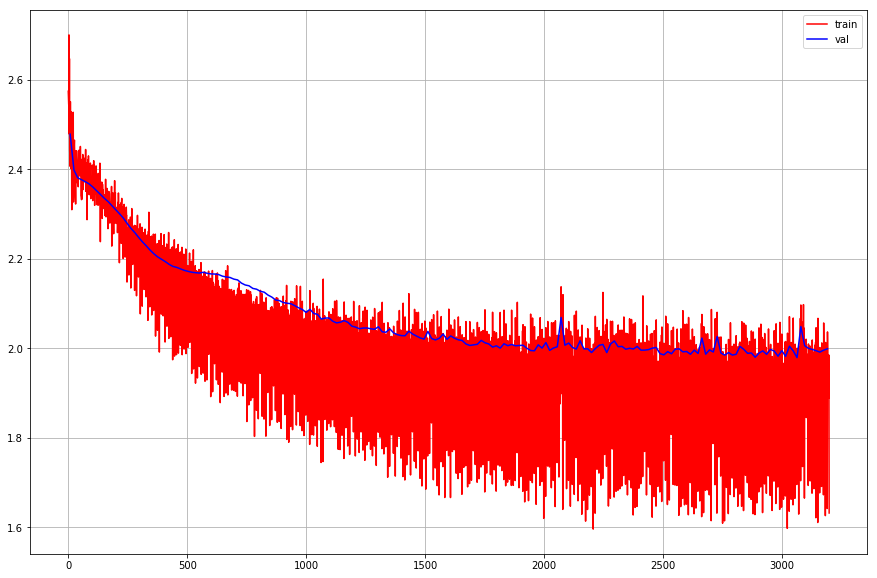

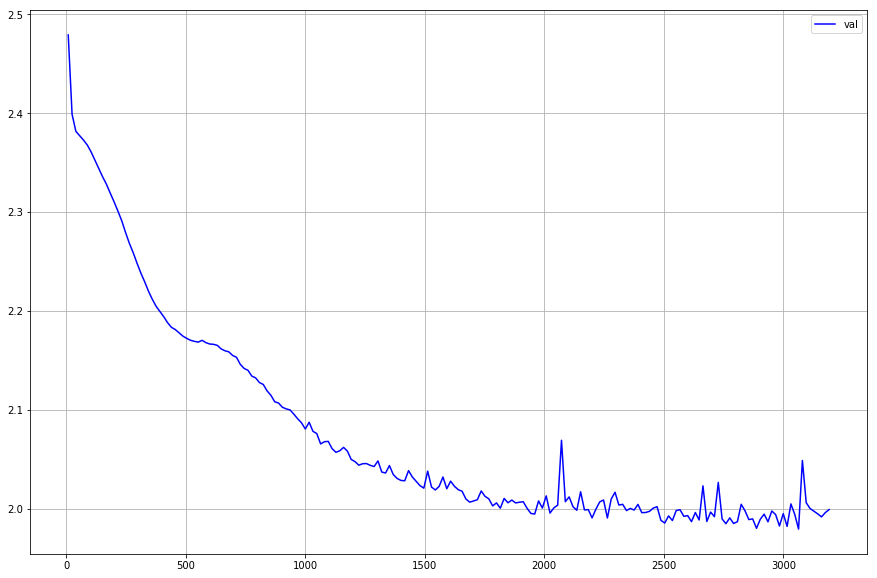

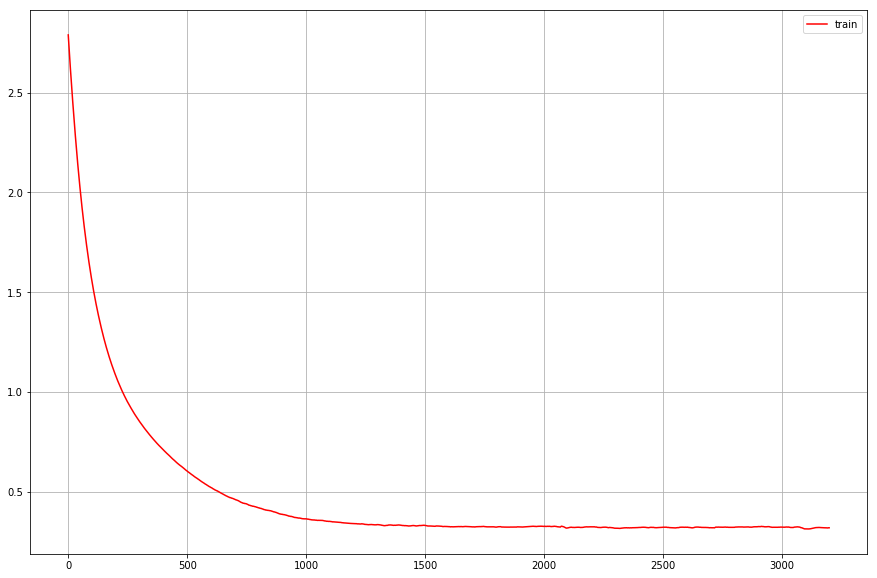

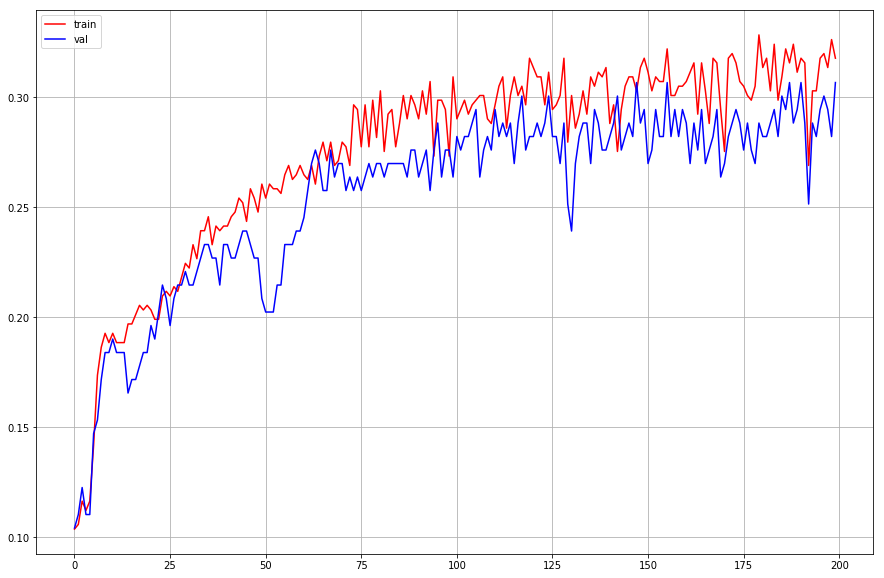

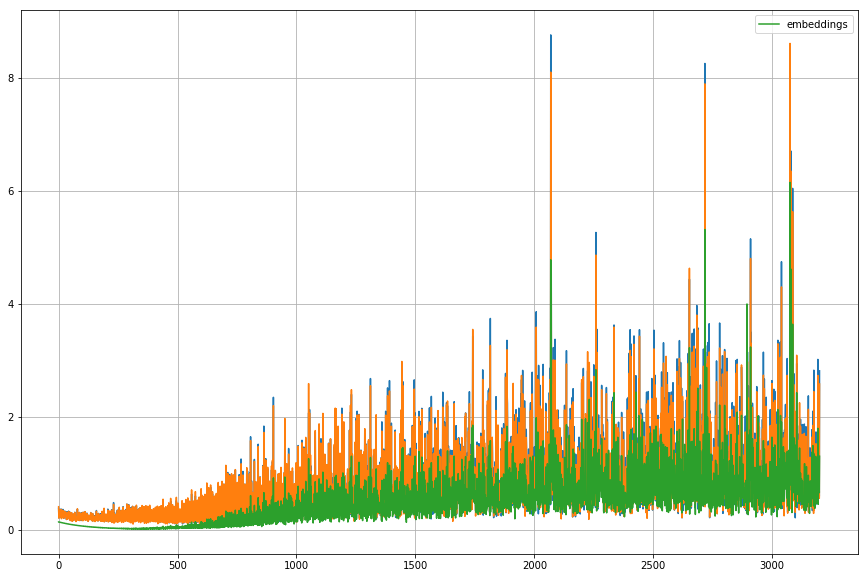

Epoch took  59.24019384384155


In [27]:
trainer.train(batch_sampler, {"n_epochs":400})

In [30]:
import gc
gc.collect()

536

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
def build_confusion_matrix(predicted_probs, true):
    n_labels = predicted_probs.shape[1]
#     assert true_y.shape == predicted_probs.shape
    result = np.zeros(shape=(n_labels, n_labels))
    
    pred = predicted_probs.argmax(axis=1)
#     true = true_y.argmax(axis=1)
    
    for pred_cls in range(n_labels):
        for true_cls in range(n_labels):
            result[true_cls, pred_cls] = np.count_nonzero(true[pred == pred_cls] == true_cls)
    norm = result.sum(axis=1)
    norm = np.maximum(norm, 1)
#     result /= norm[:, None]
    return result

def plot_confusion_matrix(confusion_matrix):
    fig = plt.figure( figsize=(20, 20))
    plt.xlabel("True classes")
    plt.ylabel("Predicted classes")
#     sns.heatmap(confusion_matrix, annot=True, vmin=0.0, vmax=1.0, cmap="YlGnBu")
    sns.heatmap(confusion_matrix, annot=True, vmin=0.0, cmap="YlGnBu")

In [32]:
cls.eval()
x, y = batch_sampler.x_train, batch_sampler.y_train
pred = torch.nn.functional.softmax(cls.forward(x), dim=1)

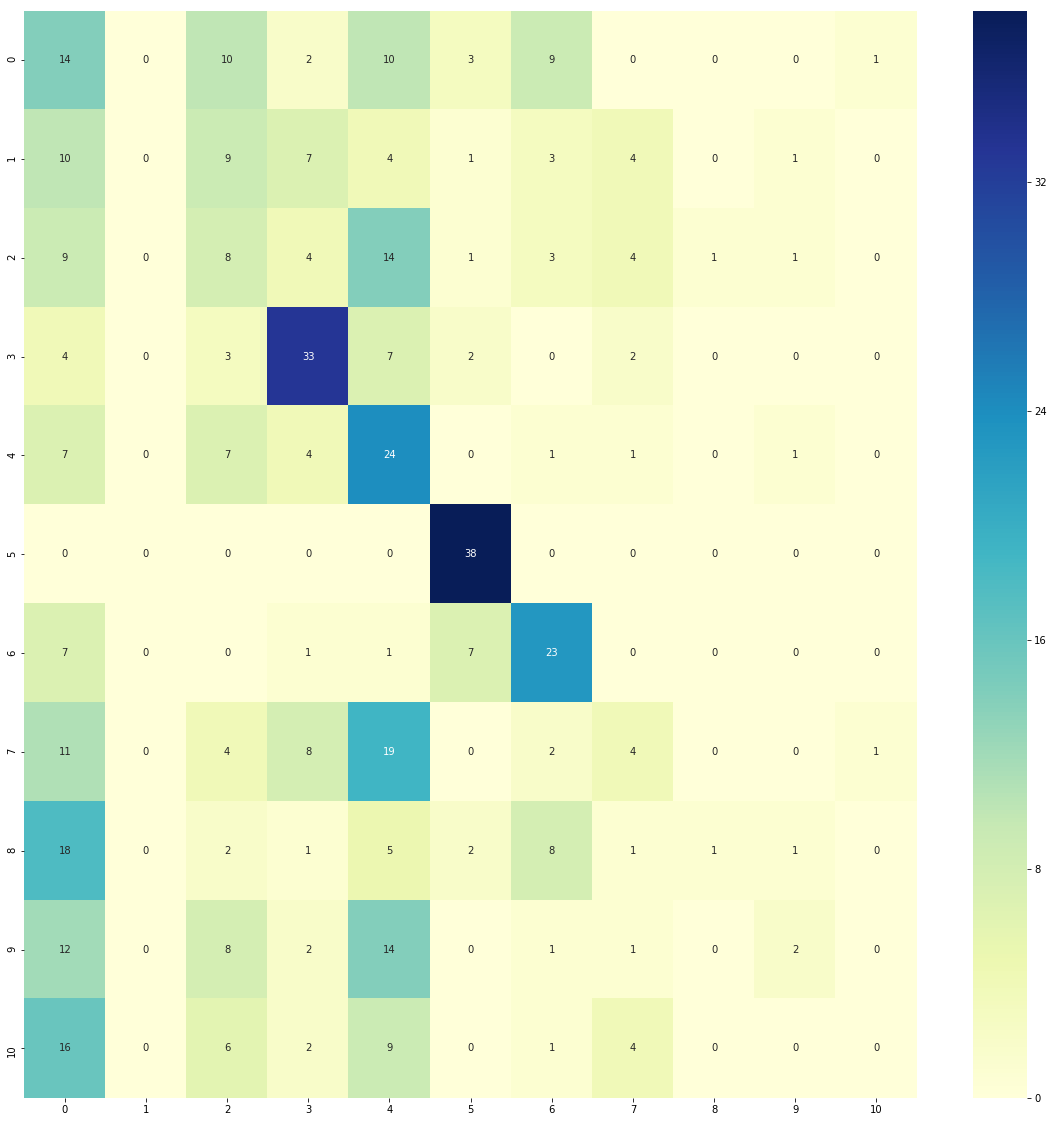

In [33]:
plot_confusion_matrix(build_confusion_matrix(pred.detach().numpy(), y.reshape(-1, 1)))

In [34]:
#cls.eval()
x, y = batch_sampler.x_test, batch_sampler.y_test
pred = torch.nn.functional.softmax(cls.forward(x), dim=1)

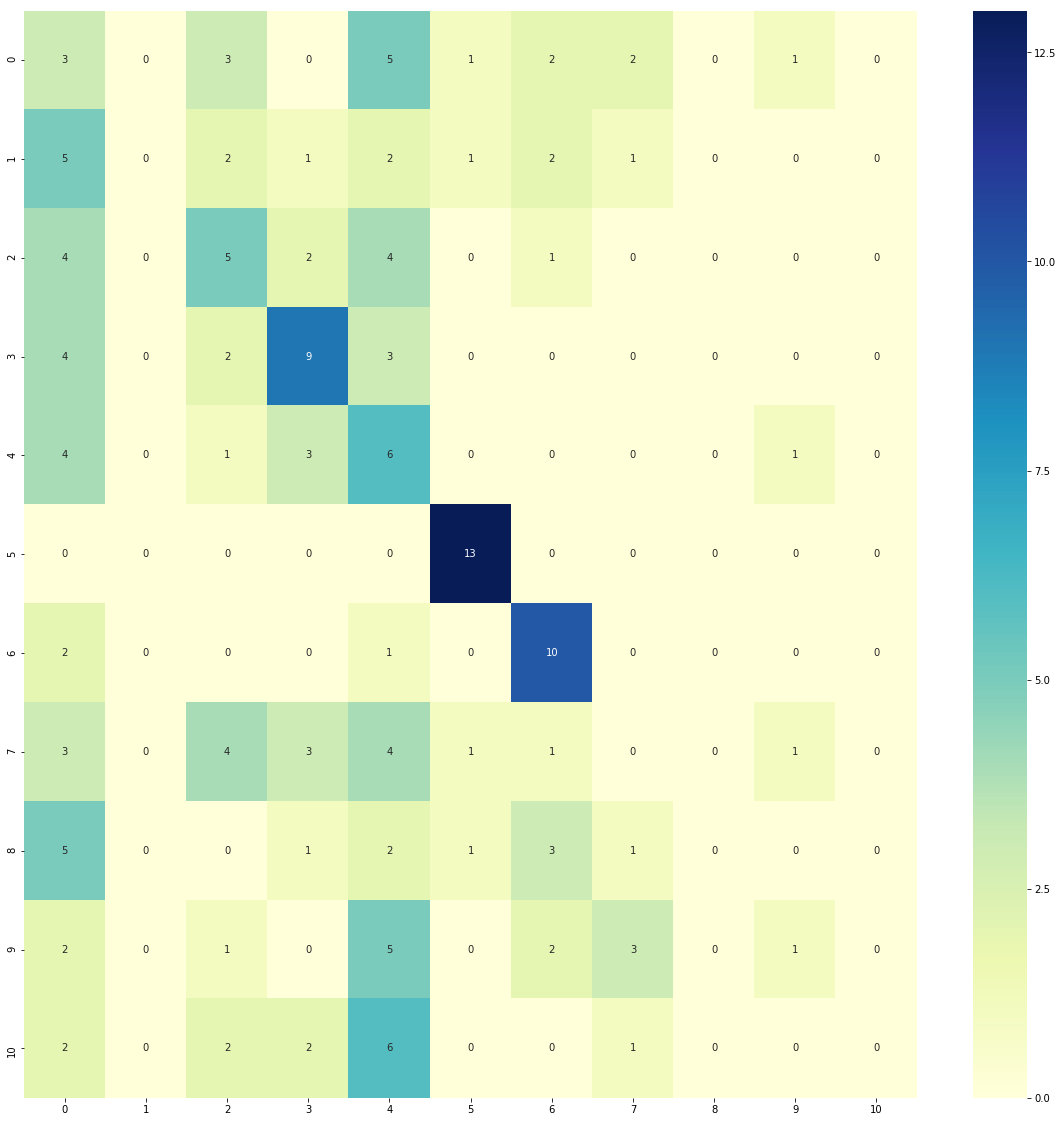

In [35]:
plot_confusion_matrix(build_confusion_matrix(pred.detach().numpy(), y.reshape(-1, 1)))